# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Radisha Fanni Sianti
- Cita-cita semasa kecil: Ibu Rumah Tangga

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# please import as much as you need

In [56]:
# read your data
filepath = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [57]:
data_agg = df.groupby('PaymentMethod').agg({'MonthlyCharges': ['mean']}).reset_index()
data_agg.columns = ['Metode Pembayaran','Rata-Rata Monthly Charge']
data_agg

,Metode Pembayaran,Rata-Rata Monthly Charge
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

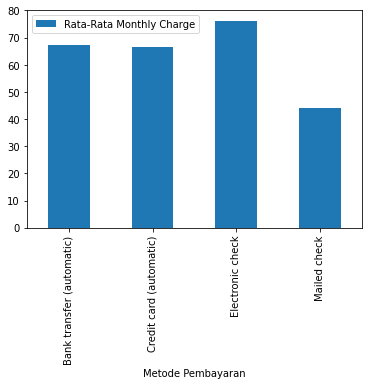

In [58]:
data_agg.plot(x = "Metode Pembayaran", y = "Rata-Rata Monthly Charge", kind = "bar")
plt.xticks(rotation = 90)

Jadi, dari plot di atas, dapat disimpulkan bahwa metode pembayaran yang memiliki MonthlyCharges terbesar adalah Electronic Check dengan rata-rata sebesar 76.255814. Sedangkan metode pembayaran yang memiliki MonthlyCharges terkecil adalah Mailed Check dengan rata-rata sebesar 43.917060.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [59]:
# your code goes here!
df["Tenure Group"] = np.where(df["tenure"] > 40, "high_tenure", 
                              np.where(df["tenure"] > 20, "medium_tenure", "low_tenure"))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [60]:
data_agg = df.groupby('Tenure Group').agg({'Tenure Group': ['count']}).reset_index()
data_agg.columns = ['Tenure Group','Jumlah Tenure Group']
data_agg

,Tenure Group,Jumlah Tenure Group
0,high_tenure,2757
1,low_tenure,2878
2,medium_tenure,1408


(array([0, 1, 2]),
 [Text(0, 0, 'high_tenure'),
  Text(1, 0, 'low_tenure'),
  Text(2, 0, 'medium_tenure')])

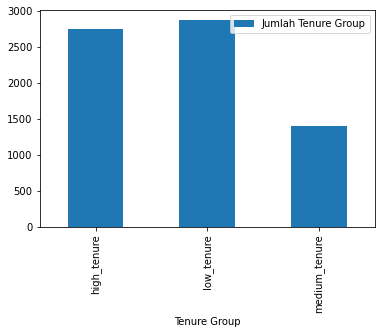

In [61]:
data_agg.plot(x = "Tenure Group", y = "Jumlah Tenure Group", kind = "bar")
plt.xticks(rotation = 90)

Jadi, dari plot di atas, kami menyimpulkan bahwa jumlah customer berdasarkan Tenure Group yang terbesar adalah low_tenure, Sedangkan jumlah customer berdasarkan Tenure Group yang terkecil adalah medium_tenure.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [66]:
df_senior = df[df["SeniorCitizen"] == 1]
df_senior_agg = df.groupby('PhoneService').agg({'PhoneService': ['count']}).reset_index()
df_senior_agg.columns = ['PhoneService','JumlahPhoneService']
df_senior_agg

,PhoneService,JumlahPhoneService
0,No,682
1,Yes,6361


In [76]:
df_senior_agg["Persentase"] = (df_senior_agg["JumlahPhoneService"]*100) / 7043
df_senior_agg

,PhoneService,JumlahPhoneService,Persentase
0,No,682,9.683374
1,Yes,6361,90.316626


<AxesSubplot:ylabel='JumlahPhoneService'>

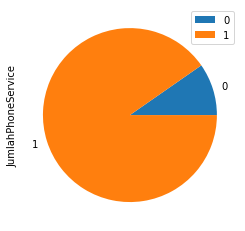

In [78]:
df_senior_agg.plot(y = "JumlahPhoneService", kind = "pie")

Jadi, dari plot di atas, dapat disimpulkan bahwa sebanyak 90,32% SeniorCitizen berlangganan PhonService yang ditandai dengan warna pie chart berwarna orange. Sedangkan hanya 9,68% SeniorCitizen yang tidak berlangganan PhoneService yang ditandai dengan warna pie chart berwaarna biru.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [79]:
# your code goes here!
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

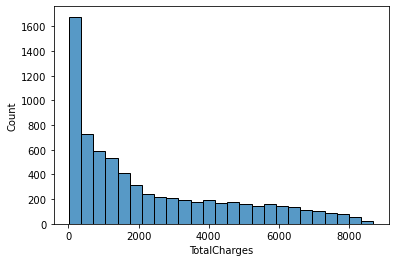

In [80]:
sns.histplot(x = "TotalCharges", data = df)

In [81]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Jadi, dari plot di atas, dapat disimpulkan bahwa secara visual variabel TotalCharges tidak berdistribusi normal. Pada grafik histogram menunjukkan plot yang berbentuk Positively Skewed yang artinya nilai mean TotalCharges lebih besar dibandingkan dengan median TotalCharges.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [83]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

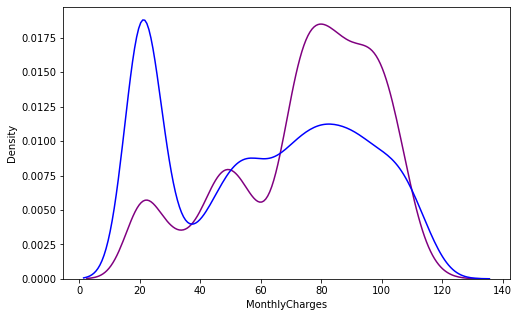

In [86]:
fig, ax = plt.subplots(figsize = (8,5))
sns.kdeplot(df[df.Churn == "Yes"]["MonthlyCharges"], color = "purple", label = "Yes", ax = ax)
sns.kdeplot(df[df.Churn == "No"]["MonthlyCharges"], color = "blue", label = "No", ax = ax)

Jadi, dari plot di atas, dapat disimpulkan bahwa : <br> 
Pada histogram customer yang churn digambarkan pada garis yang berwarna ungu memiliki plot yang cenderung meningkat, terdapat 3 titik puncak pada histogram customer yang churn dan paling tinggi berada pada disekitar customer yang memiliki MonthlyCharges di sekitar 70-100. 

Pada histogram customer yang non churn digambarkan pada garis yang berwarna biru memiliki plot yang cendurng meningkat kemudian menurun, terdapat 3 titik puncak pada histogram customer yang non churn dan paling tinggi berada pada sekitar customer yang memiliki MonthlyCharges di sekitar 10-30.

Berdarkan kedua histogram diketahui bahwa customer yang memiliki MonthlyCharges cenderung tinggi cenderung churn.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [88]:
df["Partner_Dependents"] = df["Partner"] + "_" + df["Dependents"]
df_grouped = df.groupby(["Partner_Dependents", "Churn"]).agg({"customerID": "nunique"}).reset_index()
df_grouped.columns = ["Partner_Dependents", "Churn", "Jumlah"]
df_grouped

,Partner_Dependents,Churn,Jumlah
0,No_No,No,2157
1,No_No,Yes,1123
2,No_Yes,No,284
3,No_Yes,Yes,77
4,Yes_No,No,1233
5,Yes_No,Yes,420
6,Yes_Yes,No,1500
7,Yes_Yes,Yes,249


In [98]:
df_all = df.groupby(["Partner_Dependents"]).agg({"customerID": "nunique"}).reset_index()
df_all.rename(columns = {"customerID" : "customerAll"}, inplace = True)
df_all

,Partner_Dependents,customerAll
0,No_No,3280
1,No_Yes,361
2,Yes_No,1653
3,Yes_Yes,1749


In [99]:
df_merge = df_grouped.merge(df_all, how= "left", on = "Partner_Dependents")
df_merge

,Partner_Dependents,Churn,Jumlah,customerAll
0,No_No,No,2157,3280
1,No_No,Yes,1123,3280
2,No_Yes,No,284,361
3,No_Yes,Yes,77,361
4,Yes_No,No,1233,1653
5,Yes_No,Yes,420,1653
6,Yes_Yes,No,1500,1749
7,Yes_Yes,Yes,249,1749


In [102]:
df_merge["Percentage"] = round(df_merge["Jumlah"]/ df_merge["customerAll"],3)*100
df_merge

,Partner_Dependents,Churn,Jumlah,customerAll,Percentage
0,No_No,No,2157,3280,65.8
1,No_No,Yes,1123,3280,34.2
2,No_Yes,No,284,361,78.7
3,No_Yes,Yes,77,361,21.3
4,Yes_No,No,1233,1653,74.6
5,Yes_No,Yes,420,1653,25.4
6,Yes_Yes,No,1500,1749,85.8
7,Yes_Yes,Yes,249,1749,14.2


<AxesSubplot:xlabel='Partner_Dependents', ylabel='Percentage'>

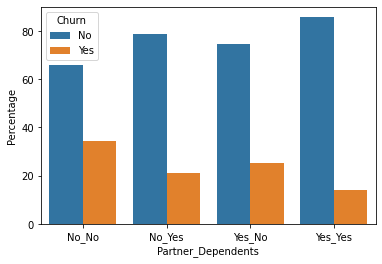

In [103]:
sns.barplot(x= "Partner_Dependents", y = "Percentage", data = df_merge, hue = "Churn")

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki Partner dan Dependents (bar Yes_Yes) memiliki persentase yang paling tinggi untuk customer yang tidak churn dan persetase paling rendah untuk  customer yang churn. Sedangkan customer yang tidak memiliki Partner dan Dependents (Bar No_No) memiliki pesentase customer yang tidak churn lebih sedikit dibandingkan customer yang memiliki Partner dan Dependents dan persentase palung tinggi untuk customer yang churn. 

Kemudian berdasarkan bar No_Yes dan Yes_No diketahui bahwa customer yang tidak memiliki Partner tapi memiliki Dependents memiliki persentase customr yang tidak churn lebih besar dibadingkan customer yang memiliki partner tapi memiliki Dependents dan customer yang churn juga lebih sedikit dibandingkan dengan customer yang memiliki partner tapi memiliki Dependents.

Hal ini berarti customer yang memiliki Partner dan Dependents mempengaruhi tingkat customer churn.  



$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [107]:
df[["customerID","PaymentMethod", "Churn"]]

,customerID,PaymentMethod,Churn
0,7590-VHVEG,Electronic check,No
1,5575-GNVDE,Mailed check,No
2,3668-QPYBK,Mailed check,Yes
3,7795-CFOCW,Bank transfer (automatic),No
4,9237-HQITU,Electronic check,Yes
...,...,...,...
7038,6840-RESVB,Mailed check,No
7039,2234-XADUH,Credit card (automatic),No
7040,4801-JZAZL,Electronic check,No
7041,8361-LTMKD,Mailed check,Yes


In [122]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df["PaymentMethod"].value_counts()

In [108]:
df_grouped = df.groupby(["Churn", "PaymentMethod"]).agg({"customerID": "nunique"}).reset_index()
df_grouped.columns = ["Churn","PaymentMethod", "Jumlah"]
df_grouped

,Churn,PaymentMethod,Jumlah
0,No,Bank transfer (automatic),1286
1,No,Credit card (automatic),1290
2,No,Electronic check,1294
3,No,Mailed check,1304
4,Yes,Bank transfer (automatic),258
5,Yes,Credit card (automatic),232
6,Yes,Electronic check,1071
7,Yes,Mailed check,308


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

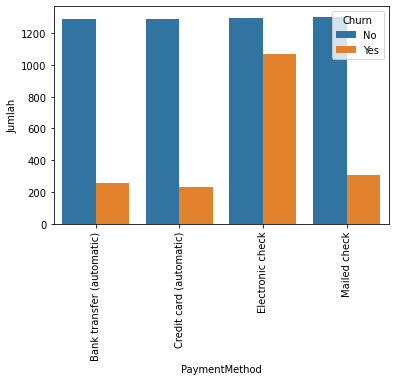

In [110]:
sns.barplot(x= "PaymentMethod", y = "Jumlah", data = df_grouped, hue = "Churn")
plt.xticks(rotation = 90)

Berdasarkan Bar Plot dapat diketahui bahwa tingkat customer churn yang paling tinggi terjadi pada PaymentMethod Electronic Check sebanya 1071, angka ini cenderung outlier jika dibandingkan dengan PaymentMethod lainnya pada customer churn. Sedangkan pada customer yang tidak churn, terdapat 4 PaymentMethod yang berkisar diantara 1286-1304 dan Payment Mehod Mailed Check lebih sering digunakan pada customer non churn

Insight yang dapat diambil dari dataframe diatas adalah PaymentMethod untuk electronic check cenderung membuat customer churn meningkat. Untuk analisis lebih lanjut dapat dilakukan analisi pada variabel lainnya.